In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Task3 
## Predicted Customer Churn and Evaluated Model Performance:

# Task3, 1 
## Utilise the trained ANN model to predict customer churn based on critical customer attributes and behaviours.

In [29]:
# Load the dataset
df = pd.read_csv('D:\\WIL PROGRAM\\Customer_Churn_data.csv')

# Define categorical and numerical features
categorical_features = ['gender', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract']
numerical_features = ['tenure', 'MonthlyCharges']

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Encode 'Yes' as 1 and 'No' as 0

# Apply preprocessing and split the data into training and test sets
X_preprocessed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the ANN model (MLPClassifier)
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict customer churn on the test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Ensure y_proba is defined
if y_proba is None:
    raise ValueError("The predicted probabilities are not defined. Check your model and prediction code.")



#  Task3,2: 
##  (Evaluate the model's predictive performance by analysing the accuracy and robustness of churn predictions against the ground truth.)

## Evaluating these Metrics for the given task:
### 1.Confusion Matrix: To see how many true positives, true negatives, false positives, and false negatives your model has.
### 2.Classification Report: Provides precision, recall, and F1 score for each class.
### 3.ROC-AUC: To evaluate the performance of the model across different classification thresholds.


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[942  94]
 [176 197]]

ROC-AUC Score: 0.85


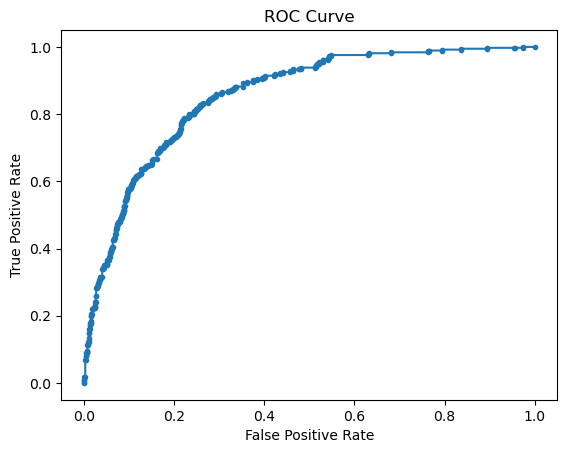

In [31]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f'\nROC-AUC Score: {roc_auc:.2f}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()